<a href="https://colab.research.google.com/github/Josaphat12-tech/Deep-Learning--And-Machine-Learning-For-Real-Beginners/blob/main/Small_Image_Classification_Using_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt


In [7]:
# Testing You have a GPU on your laptop
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [8]:
# Testing if Your Tensorflow came with cuda built in it
tf.test.is_built_with_cuda()

True

In [9]:
# On some laptop the datasets loading operation will fail if you don't add these lines of codes below
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
#Downloading and Loading the dataset from keras
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.cifar10.load_data()

170508288/170498071 [==============================] - 11s 0us/step


In [10]:
# plt.matshow(x_train[0][1])
x_train.shape

(50000, 32, 32, 3)

In [11]:
# Creating a Function to Help us plot those images
def plot_image(index):
    plt.figure(figsize=(10,1))
    plt.imshow(x_train[index])

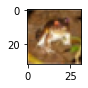

In [12]:
# Calling the function by plotting the image at that index
plot_image(0)

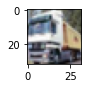

In [13]:
plot_image(1)

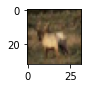

In [14]:
plot_image(3)

In [15]:
# check the element at the 3 index of y_train
y_train[3]

array([4], dtype=uint8)

In [16]:
# Creating a list of categories
classes = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [17]:
# trying to check the category of the 3rth elemt of the y_train
classes[y_train[3][0]]

'deer'

In [18]:
# scaling these x_train,and x_test variables so that our model can perfom Quickly
x_train_scaled = x_train / 255
x_test_scaled = x_test / 255

In [19]:
# checking the values in the new x_train_scaled variable created up
x_train_scaled

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

In [20]:
# checking these descret values of the y_tain variable varies from index 0 to 5
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [21]:
# Here we need to perfom the OneHotEncoder on the y_train and y_test variables by using this API built in Keras
y_train_categorical = keras.utils.to_categorical(
y_train,num_classes=10,dtype='float32'
)

# This is the output after applying the OneHotEncoder
y_train_categorical[:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [22]:
# Do the same with y_test variable
y_test_categorical = keras.utils.to_categorical(
y_test,num_classes=10,dtype='float32'
)
y_test_categorical[:5]

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

In [23]:
# let's now create our model and apply some layers on it 
# PS: Put as many layers as You want the choice is personnal
# but also remember as long as you put many hidden layers ,The Accuracy will be High
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(3000,activation='relu'),
    keras.layers.Dense(1000,activation='relu'),
    keras.layers.Dense(800,activation='relu'),
    keras.layers.Dense(400,activation='relu'),
    keras.layers.Dense(200,activation='relu'),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])
# Now let's Compile our model by providing some parameters to it
model.compile(optimizer='SGD',
             loss = 'categorical_crossentropy', #Used for the one hot encoder values reffer to Y values
            metrics = ['accuracy']
             )
# now you fit you model with the x_train_scaled and y_train_categorical
model.fit(x_train_scaled,y_train_categorical,epochs =10 )

Epoch 1/10
1563/1563 [==============================] - 127s 80ms/step - loss: 1.8663 - accuracy: 0.3247
Epoch 2/10
1563/1563 [==============================] - 124s 79ms/step - loss: 1.6542 - accuracy: 0.4069
Epoch 3/10
1563/1563 [==============================] - 122s 78ms/step - loss: 1.5564 - accuracy: 0.4436
Epoch 4/10
1563/1563 [==============================] - 123s 79ms/step - loss: 1.4857 - accuracy: 0.4684
Epoch 5/10
1563/1563 [==============================] - 122s 78ms/step - loss: 1.4315 - accuracy: 0.4892
Epoch 6/10
1563/1563 [==============================] - 125s 80ms/step - loss: 1.3788 - accuracy: 0.5079
Epoch 7/10
1563/1563 [==============================] - 125s 80ms/step - loss: 1.3354 - accuracy: 0.5244
Epoch 8/10
1563/1563 [==============================] - 124s 79ms/step - loss: 1.2986 - accuracy: 0.5385
Epoch 9/10
1563/1563 [==============================] - 122s 78ms/step - loss: 1.2607 - accuracy: 0.5523
Epoch 10/10
1563/1563 [==============================] 

In [29]:
# now here we Are predicting the value at the first index of x_test_scaled variable and check its classe
classes[np.argmax(model.predict(x_test_scaled)[1])]

'ship'

In [28]:
# checking the classe category of the value at the first index of the y_test variable
classes[y_test[1][0]]

'ship'

In [30]:
# Now IF You Wanna Get The Accuracy and The Loss You have to Evaluate YOur model by passing the x_test_scaled and y_test_categorical variables
model.evaluate(x_test_scaled,y_test_categorical)

313/313 [==============================] - 9s 29ms/step - loss: 1.6381 - accuracy: 0.4499


[1.6381206512451172, 0.4499000012874603]

In [32]:
# Another way to create a model inside a Function 
# This is really useful when you will be using the model for different CPU or GPU
def getModel():
  model = keras.Sequential([
                        keras.layers.Flatten(input_shape=(32,32,3)),
                        keras.layers.Dense(3000,activation='relu'),
                        keras.layers.Dense(1000,activation='relu'),
                        keras.layers.Dense(800,activation='relu'),
                        keras.layers.Dense(400,activation='relu'),
                        keras.layers.Dense(200,activation='relu'),
                        keras.layers.Dense(100,activation='relu'),
                        keras.layers.Dense(10,activation='sigmoid')
                      ])
  model.compile(
                 optimizer='SGD',
                 loss='categorical_crossentropy',
                 metrics=['accuracy']
  )
  return model

In [35]:
This Code below allows us to determine the time that a certain operation took to fit a model
%%timeit -n1 -r1
# The code below helps us precising that We Wanna Use CPU for our Job
with tf.device('/CPU:0'):
  cpu_model=getModel()
  cpu_model.fit(x_train_scaled,y_train_categorical,epochs=1)

1563/1563 [==============================] - 123s 78ms/step - loss: 1.8757 - accuracy: 0.3224
1 loop, best of 1: 2min 3s per loop


In [38]:
# %%timeit -n1 -r1
# with tf.device('/CPU:0'):
#   cpu_model=getModel()
#   cpu_model.fit(x_train_scaled,y_train_categorical,epochs=1)